In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\saurabh\\Desktop\\machine learning\\multivariate reg\\Housing_Modified.csv")
df.head(5)


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


In [3]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)

df_stories = pd.get_dummies(df['stories'], prefix = "Stories")

df = pd.concat([df, df_stories], axis = 1)
del df['stories']
df.head(5)

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,Stories_four,Stories_one,Stories_three,Stories_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,0,1,0,0
3,60500.0,6650,3,1,1,1,0,0,0,0,0,0,0,0,1
4,61000.0,6360,2,1,1,0,0,0,0,0,0,0,1,0,0


In [4]:
df.corr()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,Stories_four,Stories_one,Stories_three,Stories_two
price,1.000000,0.535796,0.366447,0.516719,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074,0.372281,-0.270058,0.138254,-0.002089
lotsize,0.535796,1.000000,0.151851,0.193833,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782,0.178354,0.054348,0.020567,-0.159612
bedrooms,0.366447,0.151851,1.000000,0.373769,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953,0.145525,-0.509974,0.099150,0.377424
bathrms,0.516719,0.193833,0.373769,1.000000,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013,0.281003,-0.250784,0.036027,0.080982
driveway,0.297167,0.288778,-0.011996,0.041955,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378,0.115453,-0.053249,0.073533,-0.047074
recroom,0.254960,0.140327,0.080492,0.126892,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292,0.067567,-0.022632,-0.038733,0.006938
fullbase,0.186218,0.047487,0.097201,0.102791,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651,-0.165285,0.059154,-0.132540,0.098694
gashw,0.092837,-0.009201,0.046028,0.067365,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170,-0.062416,-0.060336,0.072922,0.054823
airco,0.453347,0.221765,0.160412,0.184955,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626,0.298887,-0.143174,0.110682,-0.074706
garagepl,0.383302,0.352872,0.139117,0.178178,0.203682,0.038122,0.052524,0.068144,0.156596,1.000000,0.092364,0.126112,0.016610,-0.079170,-0.041931


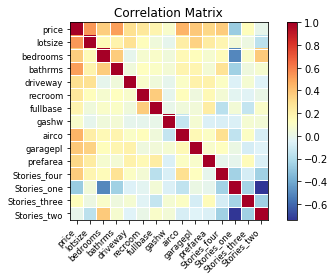

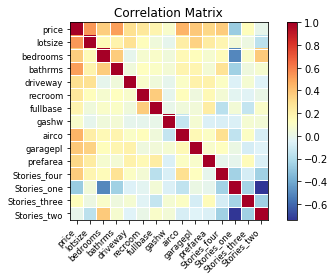

In [6]:
import statsmodels.api as sm
sm.graphics.plot_corr(df.corr(), xnames = list(df.columns))

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Select Independent variables 
independent_variables = df.columns
#Remove Dependent variable/Response variable
independent_variables = independent_variables.delete(0)

for i in range(0, len(independent_variables)):
    vif = [variance_inflation_factor(df[independent_variables].values, ix)
          for ix in range(df[independent_variables].shape[1])]
    print("Variance inflation factor for index ", i,"is :  ",  vif)
    print("Maximum variance inflation value: ", max(vif))
    print("Index of factor with high VIF : ", vif.index(max(vif)))
    if max(vif) > 10:
        independent_variables = independent_variables.delete(vif.index(max(vif)))
        
print("Final Independent variables are as follows: ", independent_variables)

Variance inflation factor for index  0 is :   [1.3704738112004569, 1.5783268259718808, 1.298777972870559, 1.1648811574651847, 1.214862009319293, 1.336911466238351, 1.053078869775805, 1.2195823546735252, 1.218832929061305, 1.181239434106175, 4.544836339845972, 11.781465345739338, 3.943698568447546, 17.220894903652624]
Maximum variance inflation value:  17.220894903652624
Index of factor with high VIF :  13
Variance inflation factor for index  1 is :   [9.027672411240845, 12.40877864989557, 9.374682124313615, 6.79426994395169, 1.4753724454932144, 2.055797712632684, 1.1031283327561414, 1.785054332017555, 1.9607784997238857, 1.5317205065647905, 1.4546157757803122, 1.8969940907498246, 1.278600527923588]
Maximum variance inflation value:  12.40877864989557
Index of factor with high VIF :  1
Variance inflation factor for index  2 is :   [8.094996102279291, 5.9918931873078485, 6.157107083439655, 1.471705272950537, 2.026343384794928, 1.102590436249824, 1.7820359988467247, 1.958085343125544, 1.5

In [10]:
#Analysis of data set using linear regression
#Divide the dataset in training and testing dataset
from sklearn.model_selection import train_test_split
X = df[independent_variables]
y = df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, y , train_size = 0.8, random_state = 1)

#Model fitting
import statsmodels.api as sm
lm = sm.OLS(Y_train, X_train).fit()

#prediction of data and check the residual errors
Y_test_pred = lm.predict(X_test)
temp_df = pd.DataFrame()
temp_df['Actual Price'] = Y_test
temp_df['Predicted Price'] = Y_test_pred
temp_df

#check the accuracy
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
rsquare = r2_score(temp_df['Actual Price'], temp_df['Predicted Price'])
print("The R-squared value for model is: ", rsquare)

The R-squared value for model is:  0.5954867637891725
